# Assignment 2 - Logistic Regression
> **FULL MARKS = 5*20 = 100**

In this assignment, you are going to implement your own logistic Regression function. Please notice no library versions of logistic regression are allowed. Follow the instructions, you will need to fill the blanks to make it functional. The process is similar to the previous assignment. 
> **Note**

This assignment is adapted from the coursera online machine learning course. You can refer it here: https://www.coursera.org/learn/machine-learning


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs4347' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'assignments/cs4347/'
FOLDERNAME = 'ML/cs4347'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


***Initialization***

In [ ]:
# load required library
import matplotlib.pyplot as plt
import numpy as np

Load data
_________

This data contains two columns ['exam1','exam2', 'admitted'], we are trying to predict whether admitted by scores of exam1 and exam2.


In [ ]:
from cs4347.assignment_datasets import assign2
data = assign2()

Visualize data
___________

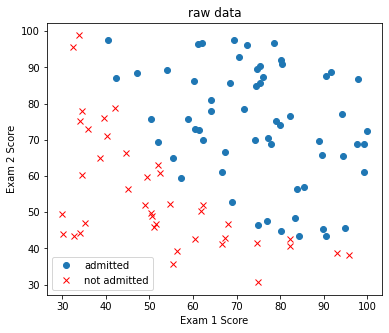

In [ ]:
# draw raw data
def draw_data(data):
    # We mark data points with admitted as 1, others as 0 for better nummerical operation
    positive = data[data.admitted.isin(['1'])]  # 1
    negative = data[data.admitted.isin(['0'])]  # 0
    # initialize plot
    fig, ax = plt.subplots(figsize=(6,5))   
    
    #########################################################################
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################

    plt.title('raw data')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    p = positive[0:]     # shape: (60, 3)
    n = negative[0:]     # shape: (40, 3)

    for marker in ['o']:
      plt.plot(p['exam1'], p['exam2'], marker, label="marker='{0}'".format(marker))
    
    for marker in ['x']:
      plt.plot(n['exam1'], n['exam2'], marker, label="marker='{0}'".format(marker), 
               color="red")

    plt.legend(['admitted', 'not admitted'], loc="lower left")
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

draw_data(data)

Sigmoid function
________________

In [ ]:
# define sigmoid function
# math: refer to https://en.wikipedia.org/wiki/Sigmoid_function or slides
def sigmoid(z):
    #########################################################################
    # TODO:                                                                 #
    # 1. implement the sigmoid function over input z
    #########################################################################

    s = 1 / (1 + np.exp(-z))

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    return s

Cost function
____________

In [ ]:
# define cost function with sigmoid function
def cost(theta, X, y):
    #########################################################################
    # TODO:                                                                 #
    # 1. implement the cross entropy loss function with sigmoid             #
    # Hint: Use @ to perform matrix element-wise multiplication             #
    #########################################################################

    z = np.dot(X, theta)                # Also, X @ theta
    h = sigmoid(z)
    co = -y * np.log(h) - (1 - y) * np.log(1 - h)                 

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return np.mean(co)

calculate gradients
________________

In [ ]:
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
def gradient(theta, X, y):
    #########################################################################
    # TODO:                                                                 #
    # 1. calculate the gradients using theta and sigmoid                    #
    # Hint: X may need to be transposed to do matrix operation              #
    #########################################################################
    
    z = np.dot(X, theta)
    h = sigmoid(z)
    grad = np.dot(X.T, (h - y)) / y.shape[0]

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return grad

In [ ]:
# predict for new X
def predict(theta, X):
    #########################################################################
    # TODO:                                                                 #
    # 1. predict the value using theta and sigmoid                          #
    # 2. convert the predicted value to 0/1                                 #
    # That's how it is called Logistic regression                           #
    #########################################################################

    predict_labels = []

    threshold = 0.5        
    h = sigmoid(X @ theta)      

    for i in h:
      if i >= threshold:                   
        predict_labels.append(1)
      else:
        predict_labels.append(0)

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return predict_labels

Calling functions
________

       exam1      exam2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


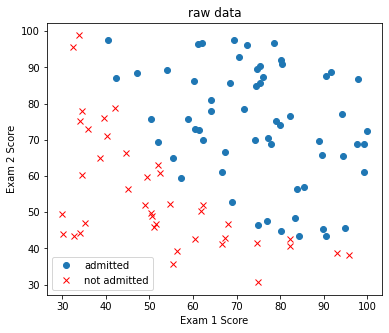

0.89

In [ ]:
# read the data
data = assign2()
# print head to check if data is correct
print(data.head())
# statistic information
data.describe()

# draw raw data
draw_data(data)

# add a ones column - this makes the matrix multiplication work out easier
if 'Ones' not in data.columns:
    data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
X = data.iloc[:, :-1].values  # Convert the frame to its Numpy-array representation.
y = data.iloc[:, -1].values  # Return is NOT a Numpy-matrix, rather, a Numpy-array.

theta = np.zeros(X.shape[1])

X.shape, theta.shape, y.shape

# invoke optimization library
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

# see the final cost
cost(result[0], X, y)

# calculate the accuracy of the model for the traning set
final_theta = result[0]
predictions = predict(final_theta, X)  
                                                 
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]     
accuracy = sum(correct) / len(X)
accuracy

**Decsion boudary** [optional, for reference]

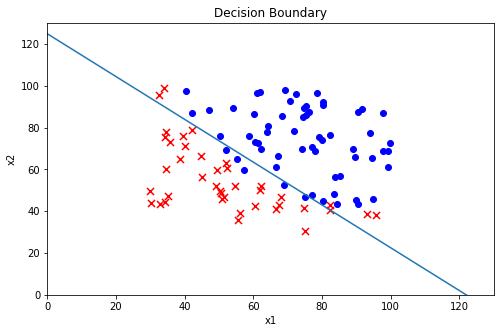

In [ ]:
# plot decsion boudary
positive = data[data.admitted.isin(['1'])]  # 1
negetive = data[data.admitted.isin(['0'])]  # 0

x1 = np.arange(130, step=0.1)
x2 = -(final_theta[0] + x1*final_theta[1]) / final_theta[2]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['exam1'], positive['exam2'], c='b', label='Admitted')
ax.scatter(negetive['exam1'], negetive['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x1, x2)
ax.set_xlim(0, 130)
ax.set_ylim(0, 130)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary')
plt.show()